In [1]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
iris = datasets.load_iris()

In [3]:
#checking corelation
import pandas as pd
X = pd.DataFrame(iris.data)
Y = pd.DataFrame(iris.target)

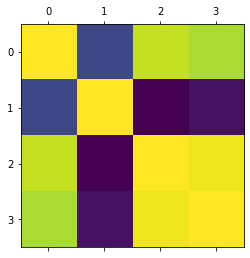

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [4]:
plt.matshow(X.corr())
plt.show()
X.corr()

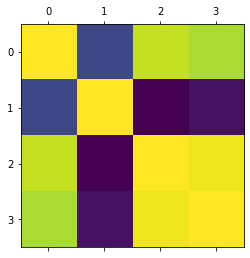

((150, 4), (150, 1))

In [5]:
X = pd.DataFrame(iris.data[:,:4])
Y = pd.DataFrame(iris.target)
plt.matshow(X.corr())
plt.show()
X.corr()
X.shape,Y.shape

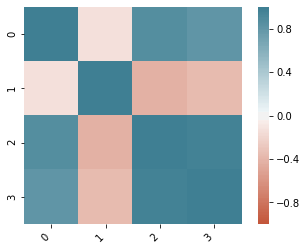

In [7]:
import seaborn as sns
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:3], iris.target, test_size=0.5, random_state=43)
#distributing datset

In [24]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  0,  0],
       [ 0,  0, 30],
       [ 0,  0, 21]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.00      0.00      0.00        30
           2       0.41      1.00      0.58        21

    accuracy                           0.60        75
   macro avg       0.47      0.67      0.53        75
weighted avg       0.44      0.60      0.48        75



c:\users\shailendra porwal\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using GaussianNB

In [27]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  0,  0],
       [ 0, 25,  5],
       [ 0,  7, 14]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.78      0.83      0.81        30
           2       0.74      0.67      0.70        21

    accuracy                           0.84        75
   macro avg       0.84      0.83      0.84        75
weighted avg       0.84      0.84      0.84        75



## Conclusion


1.   Since the dataset is small, test split was only 10%
2.   Multinomial accuracy : 60 %
3.   Gaussian accuracy : 84 %( these results are at random state 43)
2.   GaussianNB gave better results than multinomialNB. The reason is because the features in the dataset are continous( when kept random state at 42) 



# Newsgroup dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


In [ ]:
newsgroups_test.target.shape,newsgroups_train.target.shape

In [ ]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [ ]:
clf = MultinomialNB(alpha=0.1)
clf.fit(train_vectors, newsgroups_train.target)

In [ ]:
pred = clf.predict(vectors_test)
confusion_matrix(newsgroups_test.target, pred)
print(classification_report(newsgroups_test.target, pred))

#Getting a high accuracy in the above model. To show how features affect creating new model after remove some features

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers'))

In [ ]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [ ]:
clf = MultinomialNB(alpha=0.1)
clf.fit(train_vectors, newsgroups_train.target)

In [ ]:
pred = clf.predict(vectors_test)
confusion_matrix(newsgroups_test.target, pred)
print(classification_report(newsgroups_test.target, pred))

## Training new model with default alpha = 1.0

In [ ]:
clf = MultinomialNB()
clf.fit(train_vectors, newsgroups_train.target)

In [ ]:
pred = clf.predict(vectors_test)
confusion_matrix(newsgroups_test.target, pred)
print(classification_report(newsgroups_test.target, pred))

## Using GaussianNB

In [ ]:
multimodel = GaussianNB()
multimodel.fit(train_vectors.toarray(), newsgroups_train.target)

In [ ]:
pred = clf.predict(vectors_test.toarray())
confusion_matrix(newsgroups_test.target, pred)
print(classification_report(newsgroups_test.target, pred))

conclusion

1.   Taking alpha = 0.1 in initializing multinomialNB as its a hyperparameter taken in sklearn tutorial. A default model is also used. 
2.   Initial learning without removing columns show that classifier fits on the data very good but after removing headers and footers, the accuracy drops. This is because the headers and footers contain some information which is repeated for every newsgroup and hence help in classifying.
3.    Multinomial accuracy with alpha=0.1 : 79 %
4.    Multinomial accuracy with alpha 1.0 : 73 %
5.    Gaussian accuracy : 55 %
3.    Multinomial works better in this case because the number of words used are discrete and from a dictionary. 

